# Notebook for plotting intermediate results from mlflow

After HP tuning:

1. Go to parent run

2. Go to attributes

3. Download the json

4. Link it below

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [91]:
results_prithvi_subset_10 = pd.read_json("results_table_prithvi_subset_10.json", orient="split")
results_prithvi_swin_b_new_subset_10 = pd.read_json("results_table_prithvi_b_subset_new.json", orient="split")
results_scratch_subset_10 = pd.read_json("results_table_scratch_subset_10.json", orient="split")
results_imagenet_subset_10 = pd.read_json("results_table_imagenet_subset_10.json", orient="split")
results_prithvi_l_subset_10_old = pd.read_json("results_table_prithvi_l_subset_fixed.json", orient="split")
results_prithvi_l_subset_10 = pd.read_json("results_table_prithvi_l_subset_fixed_new.json", orient="split")
results_prithvi_h_subset_10 = pd.read_json("results_table_prithvi_h_subset.json", orient="split")
results_prithvi_l_subset_10_mask = pd.read_json("results_table_prithvi_l_subset_mask.json", orient="split")
results_prithvi_l_subset_10_fp32 = pd.read_json("results_table_prithvi_l_subset_fp32.json", orient="split")
prithvi_l_subset_coords_10 = pd.read_json("results_table_prithvi_l_subset_coords_pre_no_ft.json", orient="split")
prithvi_swin_l_subset_10 = pd.read_json("results_table_prithvi_swin_l_subset.json", orient="split")
results_prithvi_l_full_pretrain_subset_10 = pd.read_json("results_table_prithvi_l_full_pretrain_subset.json", orient="split")
results_prithvi_b_subset_10 = pd.read_json("results_table_prithvi_vit_b_subset.json", orient="split")
results_prithvi_b_subset_10_new = pd.read_json("results_table_prithvi_vit_b_subset_new.json", orient="split")
results_prithvi_b_os_subset_10 = pd.read_json("results_table_vit_b_os_subset.json", orient="split")
results_prithvi_3d_subset_10 = pd.read_json("results_table_swin_3d_subset_10.json", orient="split")
results_scalemae_subset_10 = pd.read_json("results_table_scalemae_subset.json", orient="split")

In [92]:
results_prithvi_subset_10["Model"] = "Prithvi Swin B (Old Training Dataset - New Dataset model training currently)"

In [93]:
results_prithvi_swin_b_new_subset_10["Model"] = "Prithvi Swin B New Dataset"

In [94]:
results_scratch_subset_10["Model"] = "Swin B Scratch"

In [95]:
results_prithvi_l_full_pretrain_subset_10["Model"] = "Prithvi ViT L (New Training Dataset)"

In [96]:
results_prithvi_l_subset_10["Model"] = "Prithvi ViT L (1/3 pretraining, Mask ratio 0.75)"

In [97]:
results_prithvi_h_subset_10["Model"] = "Prithvi ViT H (1/3 pretraining, Mask ratio 0.75)"

In [98]:
results_prithvi_l_subset_10_mask["Model"] = "Prithvi ViT L (1/3 pretraining, Mask Ratio 0.9)"

In [99]:
results_prithvi_l_subset_10_old["Model"] = "Prithvi ViT L Old"

In [100]:
results_prithvi_l_subset_10_fp32["Model"] = "Prithvi ViT L FP32"

In [101]:
results_prithvi_b_subset_10["Model"] = "Prithvi ViT B"

In [102]:
prithvi_swin_l_subset_10["Model"] = "Prithvi Swin L (Old Training Dataset)"

In [103]:
results_prithvi_b_subset_10_new["Model"] = "Prithvi ViT B (New Training Dataset)"

In [104]:
results_prithvi_b_os_subset_10["Model"] = "Prithvi ViT B Open-Sourced version"

In [105]:
results_prithvi_3d_subset_10["Model"] = "Prithvi Swin 3D"

In [106]:
results_imagenet_subset_10["Model"] = "Swin B Imagenet"

In [107]:
prithvi_l_subset_coords_10["Model"] = "Prithvi ViT Coords Pre No Coords FT"

In [108]:
results_scalemae_subset_10["Model"] = "ScaleMAE"

In [109]:
df = pd.concat([results_scratch_subset_10, results_imagenet_subset_10, results_scalemae_subset_10, results_prithvi_subset_10, results_prithvi_swin_b_new_subset_10, prithvi_swin_l_subset_10, results_prithvi_3d_subset_10, results_prithvi_h_subset_10, results_prithvi_l_full_pretrain_subset_10, results_prithvi_l_subset_10_fp32, prithvi_l_subset_coords_10, results_prithvi_b_subset_10_new, results_prithvi_b_os_subset_10
])

In [110]:
name_mapping = {"big_earth_net": "m-bigearthnet", "brick_kiln": "m-brick-kiln", "eurosat": "m-eurosat", "forestnet": "m-forestnet", "pv4ger": "m-pv4ger", "so2sat": "m-so2sat", "neontree": "m-NeonTree", "sa_crop_type": "m-SA-crop-type", "cashew": "m-cashew-plant", "chesapeake": "m-chesapeake", "nz_cattle": "m-nz-cattle", "pv4ger_seg": "m-pv4ger-seg"}
df["Task"] = df["Task"].map(name_mapping)
dataset_res = {
    "m-bigearthnet": "10m",
    "m-so2sat": "10m",
    "m-brick-kiln": "10m",
    "m-forestnet": "15m",
    "m-eurosat": "10m",
    "m-pv4ger": "0.1m",
    "m-pv4ger-seg": "0.1m",
    "m-chesapeake": "1m",
    "m-cashew-plant": "10m",
    "m-SA-crop-type": "10m",
    "m-nz-cattle": "0.1m",
    "m-NeonTree": "0.1m"
}

dataset_instrument = {
    "m-bigearthnet": "S2",
    "m-so2sat": "S2 + S1",
    "m-brick-kiln": "S2",
    "m-forestnet": "Landsat",
    "m-eurosat": "S2",
    "m-pv4ger": "RGB",
    "m-pv4ger-seg": "RGB",
    "m-chesapeake": "RGBN",
    "m-cashew-plant": "S2",
    "m-SA-crop-type": "S2",
    "m-nz-cattle": "RGB",
    "m-NeonTree": "RGB + Hyper"
}

img_size = {
    "m-bigearthnet": 120,
    "m-so2sat": 32,
    "m-brick-kiln": 64,
    "m-forestnet": 332,
    "m-eurosat": 64,
    "m-pv4ger": 320,
    "m-pv4ger-seg": 320,
    "m-chesapeake": 256,
    "m-cashew-plant": 256,
    "m-SA-crop-type": 256,
    "m-nz-cattle": 500,
    "m-NeonTree": 400
}

dataset_name_map = {name: f"{name}\n {dataset_instrument[name]} @ {dataset_res[name]}" for name in img_size.keys()}
df["Task"] = df["Task"].map(dataset_name_map)

/var/folders/fs/t946l60s4ys3hk9xq7sbp3pc0000gn/T/ipykernel_3817/530528616.py:7: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


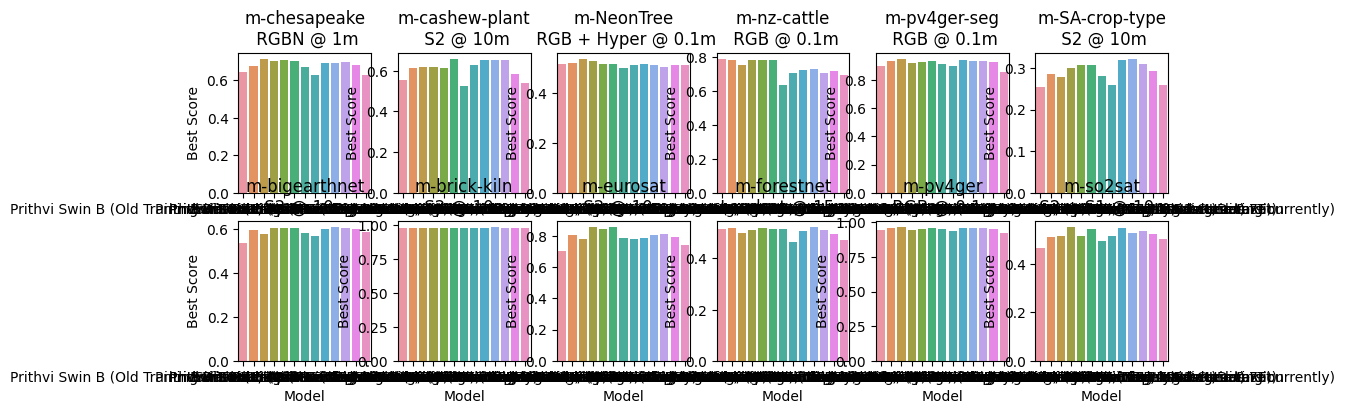

In [111]:
fig, ax = plt.subplots(2, 6, figsize=(12, 4))
for axis, dataset in zip(ax.reshape(-1), df["Task"].unique()):
    data = df[df["Task"] == dataset]
    plot = sns.barplot(data, y="Best Score", x="Model", ax=axis)
    # axis.set_ylim([0, 1])
    axis.title.set_text(dataset)
fig.tight_layout()
plt.show()

Text(0.5, 0.98, 'Performance on 10% of finetuning data')

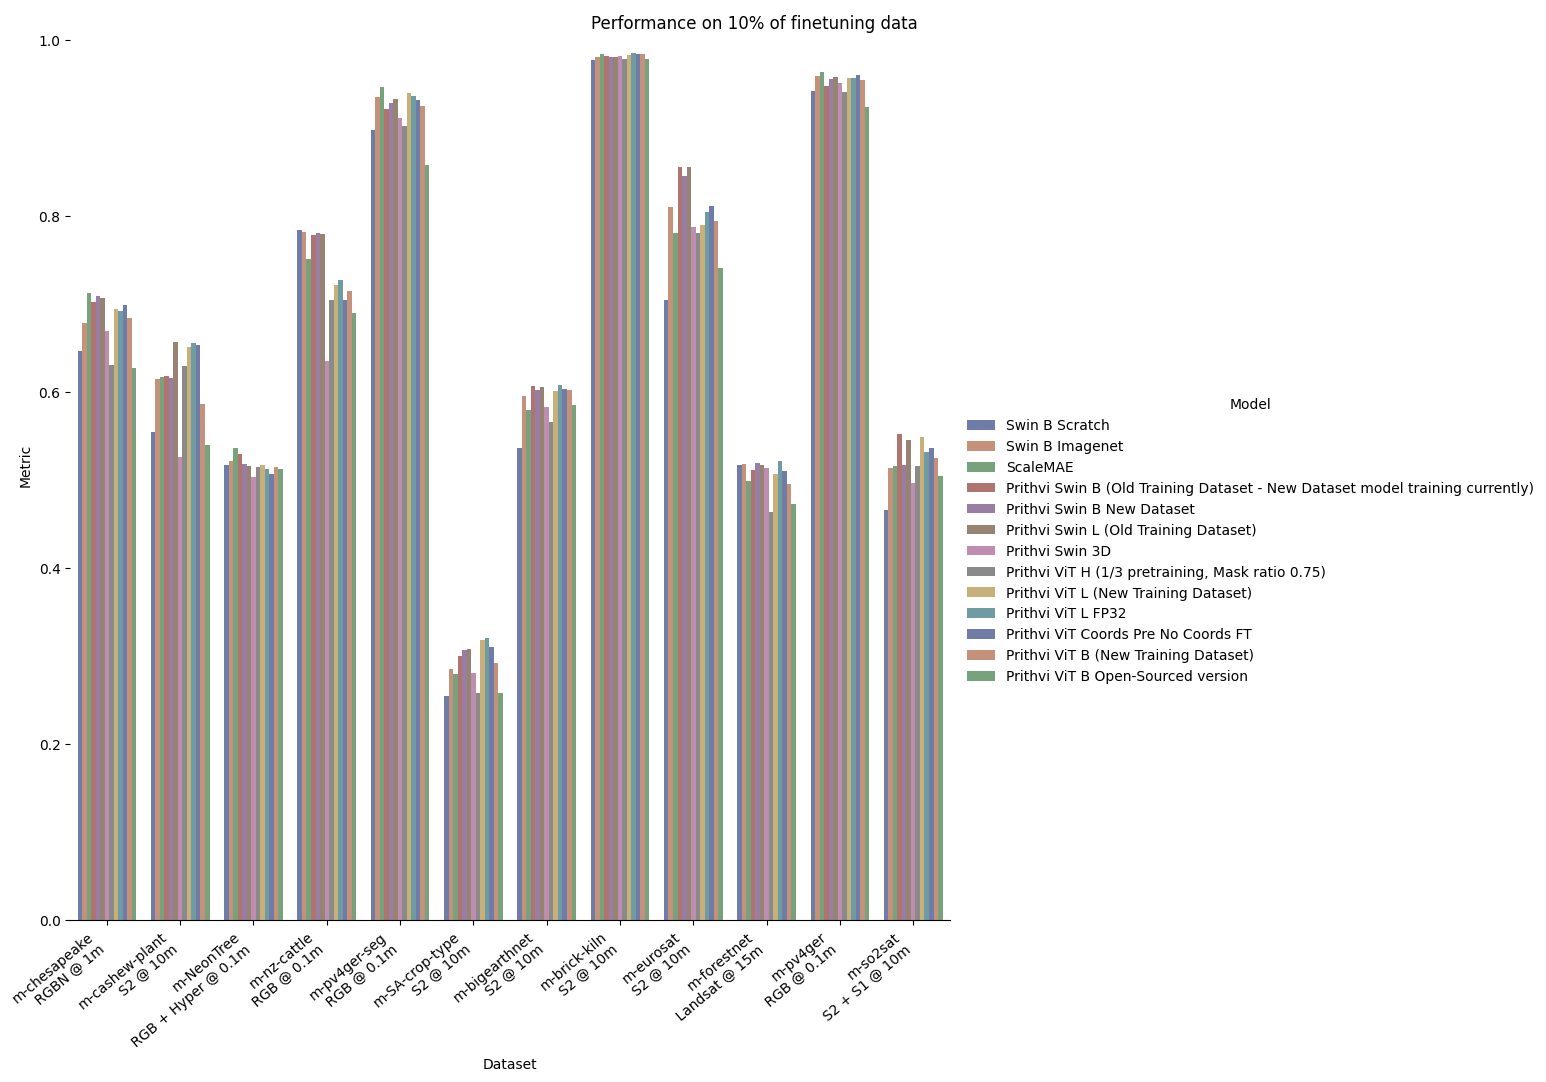

In [112]:
g = sns.catplot(
    data=df, kind="bar",
    x="Task", y="Best Score", hue="Model",
    errorbar="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("Dataset", "Metric")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.fig.suptitle("Performance on 10% of finetuning data")

In [113]:
df_subset = pd.concat([results_imagenet_subset_10, results_scalemae_subset_10, results_prithvi_subset_10, results_prithvi_swin_b_new_subset_10, prithvi_swin_l_subset_10, results_prithvi_l_full_pretrain_subset_10,results_prithvi_b_subset_10_new, results_prithvi_b_os_subset_10
])
df_subset["Task"] = df_subset["Task"].map(name_mapping)
df_subset["Task"] = df_subset["Task"].map(dataset_name_map)

Text(0.5, 0.98, 'Performance on 10% of finetuning data')

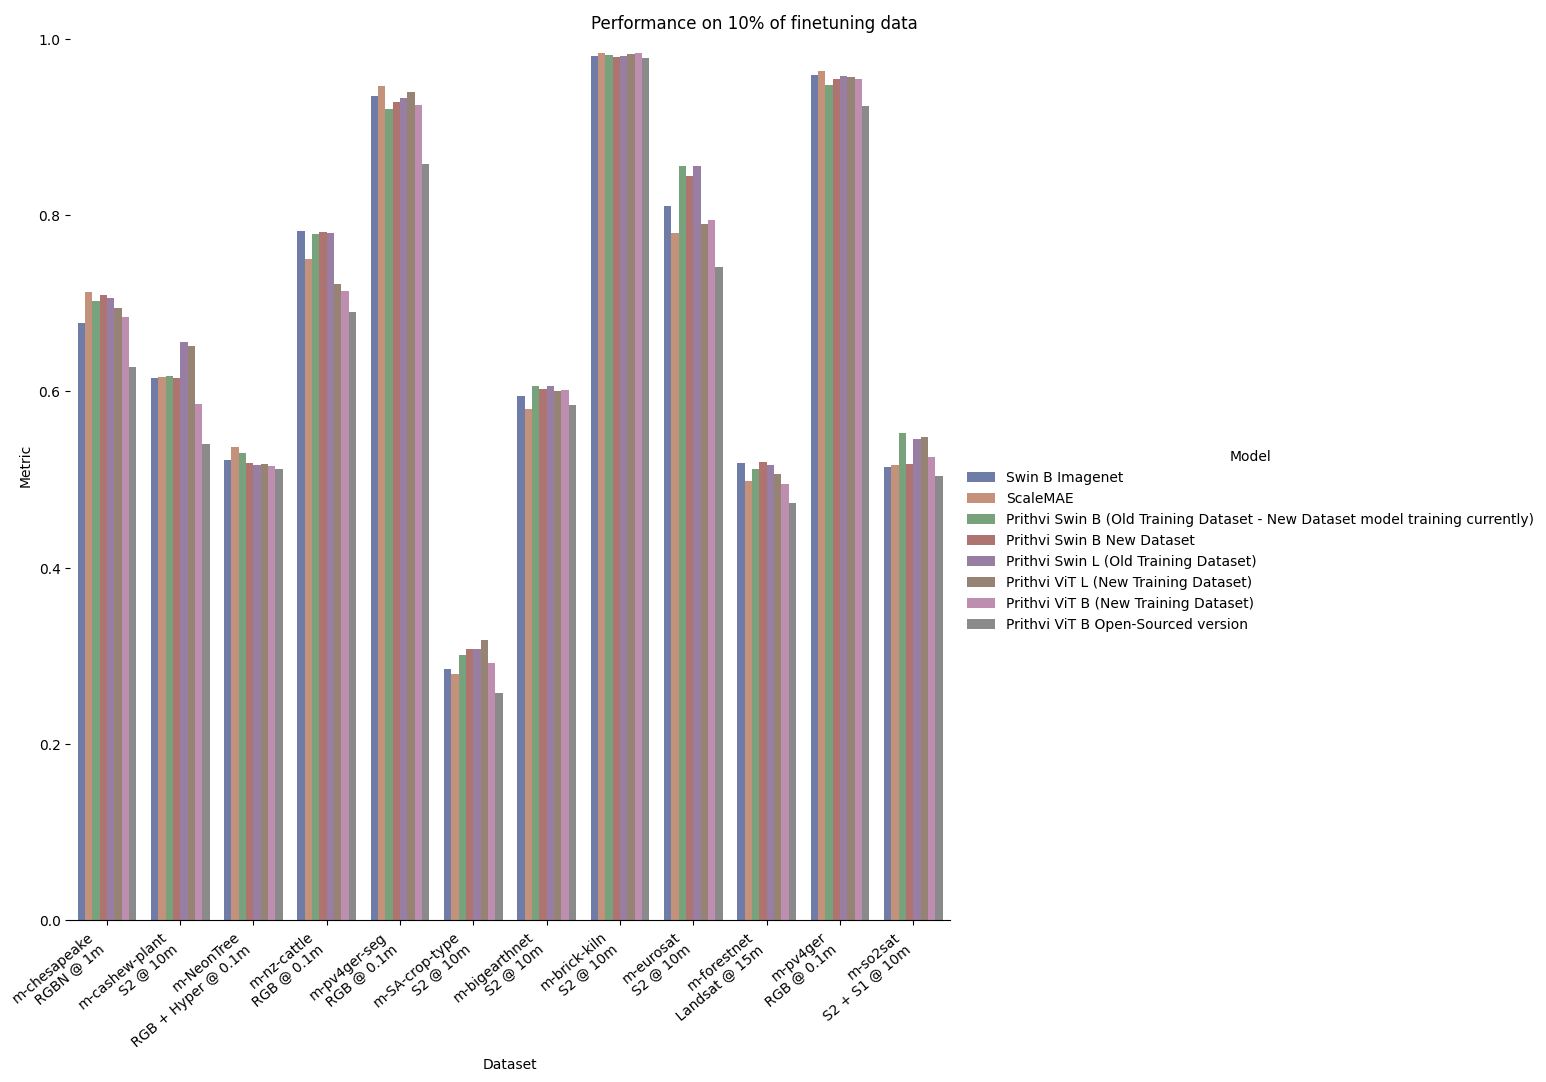

In [114]:
g = sns.catplot(
    data=df_subset, kind="bar",
    x="Task", y="Best Score", hue="Model",
    errorbar="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("Dataset", "Metric")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.fig.suptitle("Performance on 10% of finetuning data")

In [115]:
df_subset = pd.concat([results_prithvi_l_subset_10, results_prithvi_h_subset_10
])
df_subset["Task"] = df_subset["Task"].map(name_mapping)
df_subset["Task"] = df_subset["Task"].map(dataset_name_map)

Text(0.5, 0.98, 'Performance on 10% of finetuning data')

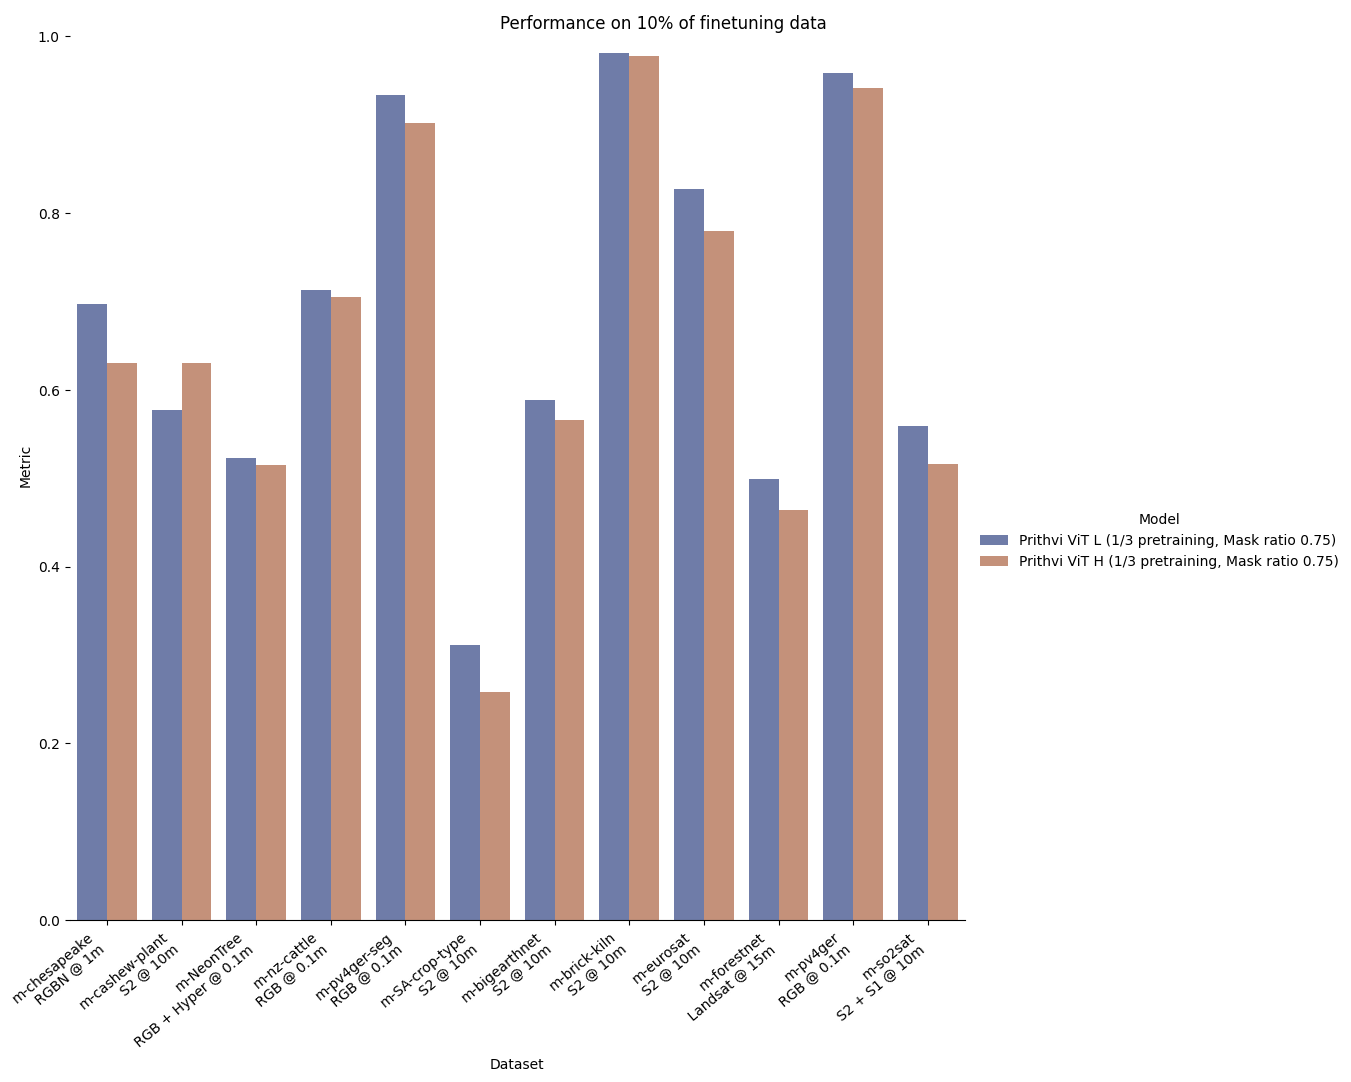

In [116]:
g = sns.catplot(
    data=df_subset, kind="bar",
    x="Task", y="Best Score", hue="Model",
    errorbar="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("Dataset", "Metric")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.fig.suptitle("Performance on 10% of finetuning data")